# LINEAR REGRESSION USING SCIKIT- LEARN 

## Linear Regression Model

Model creation of simple linear regression and evaluating the performane metrics using Mean Absolute Error, Mean Square Method and Root Mean Square method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Trying to figure out the relationship between different Features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


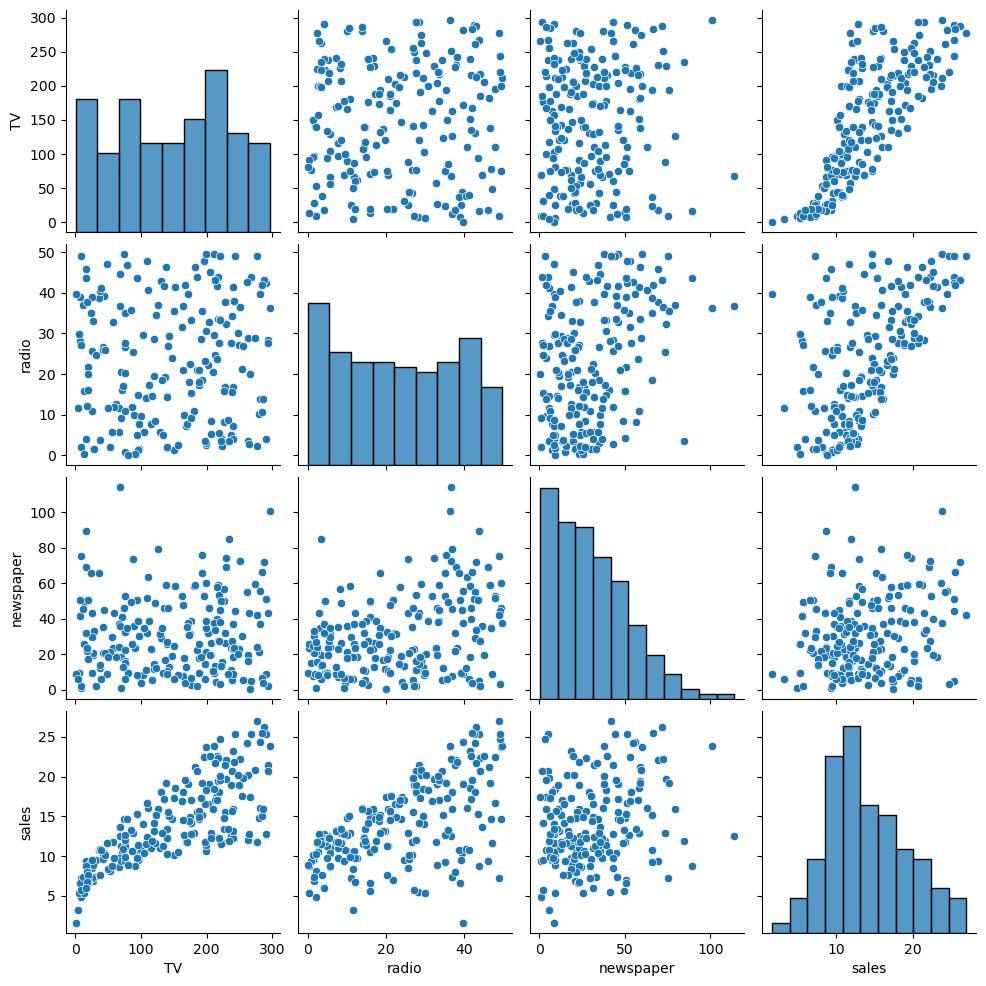

In [4]:
sns.pairplot(df)

In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

### Importing sklearn to split the dataset into training and testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NOTE : We want to compare various different models, so we should make sure that we train test split with same arguments

#### Model Creation and Training

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
test_prediction = model.predict(X_test)

### Model Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
df['sales'].mean()

14.0225

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


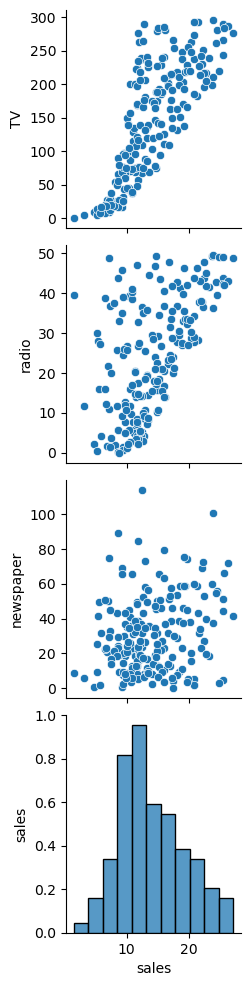

In [17]:
sns.pairplot(data=df, x_vars = 'sales')

In [18]:
mean_absolute_error(y_test, test_prediction)

1.213745773614481

In [19]:
MSE1 = mean_squared_error(y_test, test_prediction)

In [20]:
np.sqrt(MSE1)

1.5161519375993884

### Residuals Plot

Residual plots are a graphical technique used in regression analysis to visually assess the goodness-of-fit of a regression model. 

In [21]:
test_residuals = y_test - test_prediction

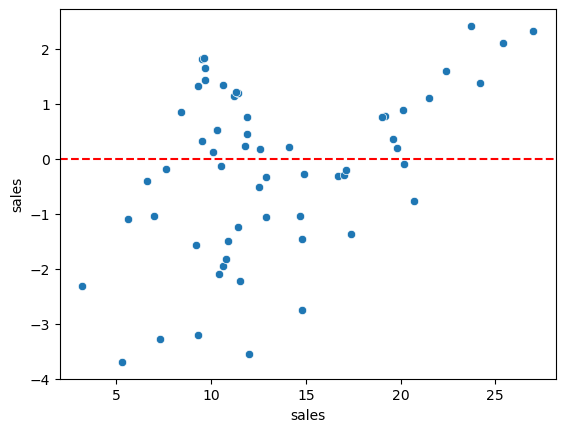

In [22]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, color = 'r', ls = '--')

NOTE : This plot is RANDOM which shows that it maybe a good choice for this dataset. If it have some type of pattern then we have a bad choice for linear model.

### Model Deployment

In [23]:
final_model = LinearRegression()

In [24]:
final_model.fit(X,y)

LinearRegression()

In [25]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

NOTE : The negative coefficient shows us that this feature contributes in negative

## Saving and loading the model 

In [26]:
from joblib import dump, load

In [27]:
dump(final_model, 'final_sales_simple_linear_model.joblib')

['final_sales_simple_linear_model.joblib']

In [28]:
loaded_model = load('final_sales_simple_linear_model.joblib')

## Checking for new predictions

In [29]:
campaign = [[149, 22, 12]]

In [72]:
loaded_model.predict(campaign)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])